In [ ]:
Stochastic Gradient Descent

In [ ]:
algorithme de gradient stochastique 

In [ ]:
Exemple sur données synthétiques

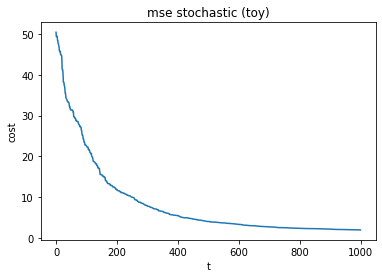

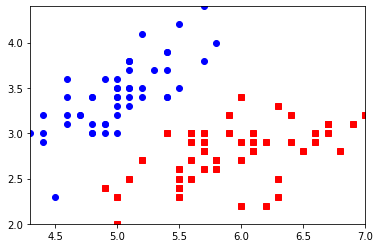

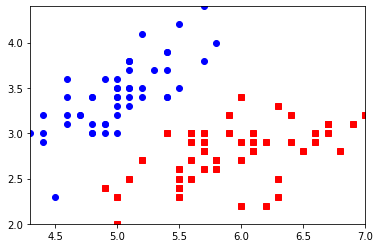

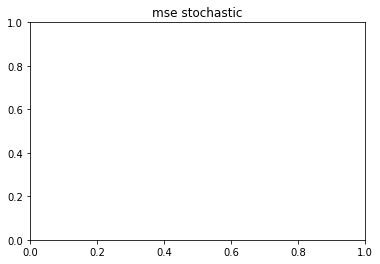

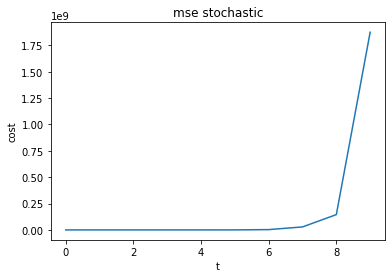

In [3]:
# %load SGDclassification.py
"""
@authors: salmon, gramfort, bellet
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

plt.close('all')


###############################################################################
#            Toy dataset
###############################################################################

n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations
gamma = 0.1  # suggested step size


def gamma(t):
    return 1. / (100 + t)

X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy


# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'
# loss = 'hinge'  # QUESTION 4


############################################################################
#                Stochastic gradient
############################################################################


def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]


def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))


def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = X[idx, :] * (np.dot(X[idx], w) - y[idx]); # QUESTION 2
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 11
            raise NotImplementedError('QUESTION 11')
        w -= gamma_func(t) * gradient
        
        if average is True:
            raise NotImplementedError('QUESTION 9')

        if alpha > 0:
            raise NotImplementedError('QUESTION 6')
        
        
        all_w[t] = w
    return w, all_w, pobj


w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,
                                         loss=loss, alpha=0, average=False)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()


############################################################################
#            Loading and visualizing the data
############################################################################

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make the problem binary
X = X[y < 2]
y = y[y < 2]
y[y == 0] = -1
X = X[:, :2]

# A function for vizualizing the data and classification given by w
def plot_2d(X, y, w=None):
    """ Plot in 2D the dataset data, colors and symbols according to the
    class given by the vector y (if given); the separating hyperplan w can
    also be displayed if asked"""
    plt.figure()
    symlist = ['o', 's', '+', 'x', 'D', '*', 'p', 'v', '-', '^']
    collist = ['blue', 'red', 'purple', 'orange', 'salmon', 'black', 'grey',
               'fuchsia']

    labs = np.unique(y)
    idxbyclass = [y == labs[i] for i in range(len(labs))]

    for i in range(len(labs)):
        plt.plot(X[idxbyclass[i], 0], X[idxbyclass[i], 1], '+',
                 color=collist[i % len(collist)], ls='None',
                 marker=symlist[i % len(symlist)])
    plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])
    plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    mx = np.min(X[:, 0])
    maxx = np.max(X[:, 0])
    if w is not None:
        plt.plot([mx, maxx], [mx * -w[1] / w[2] - w[0] / w[2],
                              maxx * -w[1] / w[2] - w[0] / w[2]],
                 "g", alpha=1.)
    plt.show()

############################################################################
#            Displaying labeled data
############################################################################

plot_2d(X[:, :2], y)


# QUESTION 8
gamma = 0.1  # step size
n_iter = 10  # number of iterations

loss = 'mse'
# loss = 'hinge'  # QUESTION 11

# Initialize w with just zeros
w_ini = np.zeros(X.shape[1] + 1)

w, all_w, pobj = stochastic_gradient(X, y, gamma, n_iter, w_ini, loss=loss)

plot_2d(X, y, w)
plt.title('%s stochastic' % loss)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic' % loss)
plt.show()

############################################################################
#            Using Scikit-Learn
############################################################################

# QUESTION 12 : compare with SGDClassifier from Scikit-Learn


### 1. On considère ici la perte quadratique $l(a, b) = \frac{(a − b)^2}{2}$. Calculer  $\frac{\partial l}{\partial a}(a,b)$  ##et pas x1

$\frac{\partial l}{\partial a}(a,b) = a-b $

on a la fonction objective $g_i(w) = l(f_w(x_i),y_i) =l(w_i^Tx_i,y_i)$ avec l la fonction loss 

$\frac{\partial l}{\partial x_i}$ correspond a la derive par rapport a la premiere variable donc 
$\frac{\partial l}{\partial w_i^Tx_i}$

donc c'est $\frac{\partial l}{\partial w_i}$


$\frac{\partial l}{\partial w_i}=x_i\frac{\partial l}{\partial x_i}(w_t^Tx_i, y_i)$



### 2. Implémenter l'algorithme SGD avec le choix d'un pas constant $\gamma$ et d'un nombre d'itérations T permettant de minimiser le critère et d'aboutir à une solution correcte

In [36]:
def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = X[idx, :] * (np.dot(X[idx], w) - y[idx]); # QUESTION 2
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 11
            raise NotImplementedError('QUESTION 11')
        w -= gamma_func(t) * gradient
        
        if average is True:
            raise NotImplementedError('QUESTION 9')

        if alpha > 0:
            #raise NotImplementedError('QUESTION 6')
            regularization = 0.5*alpha*np.dot(w,w)**2
            regular_derived = alpha*np.dot(w,w)
            gradient = gradient + regular_derived
            
        
        all_w[t] = w
    return w, all_w, pobj






### Prendre comme modèle jouet : n vecteurs (xi)1≤i≤n de $\mathbb{R}^p$tirés de manière i.i.d selon une loi gaussienne, centrée réduite (prendre n = 1000, p = 100) ainsi que n réels ($\epsilon$_i)1≤i≤n tirés de manière i.i.d selon une loi gaussienne, centrée réduite. On note $w*=(1, . . . , 1)^T$, et l'on définit ∀i ∈ {1, . . . , n}, $y_i = x_i^Tw*+ \epsilon_i$

In [23]:
n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations
gamma = 0.1  # suggested step size


def gamma(t):
    return 1. / (100 + t)

X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy


# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

w*=w_target

### 4. Afficher l'évolution de la valeur de l'objectif en fonction du nombre d'itérations, c'est-à-dire afficher la fonction $t -> \frac{1}{n}\sum_{i=1}^nl(\hat f_{w_t}(x_i),y_i)$


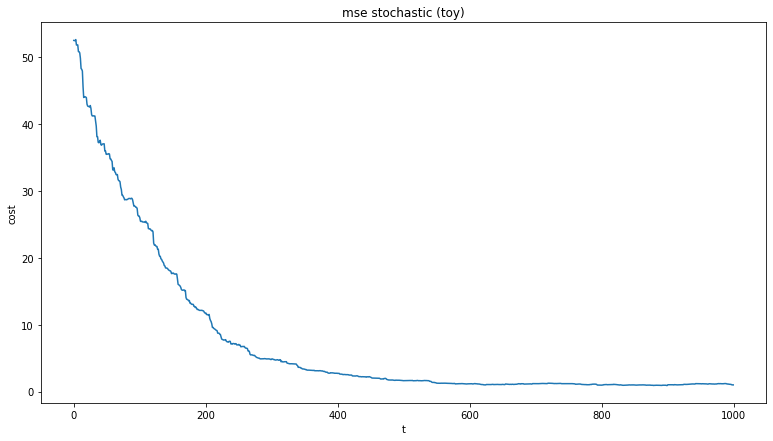

In [32]:
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, 0.0117
                                         , n_iter, w_ini,
                                         loss=loss, alpha=0, average=False)

plt.figure(figsize=(13,7))
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

### 5. Utiliser la fonction stochastic_gradient fournie. Proposer le choix d'un pas constant $\gamma$ et d'un nombre d'iterations T permettant de minimiser le critere et d'aboutir a une solution correcte.


pas constant  𝛾=  et d'un nombre d'iterations T=

### 6. Régulariser la difficulté en optimisant cette fois la fonction objective $\frac{1}{n}\sum_{i=1}^nl(\hat f_{w_t}(x_i),y_i) + \frac{a}{2} ||w||_2^2$ où α>0 est un paramètre de régularisation.


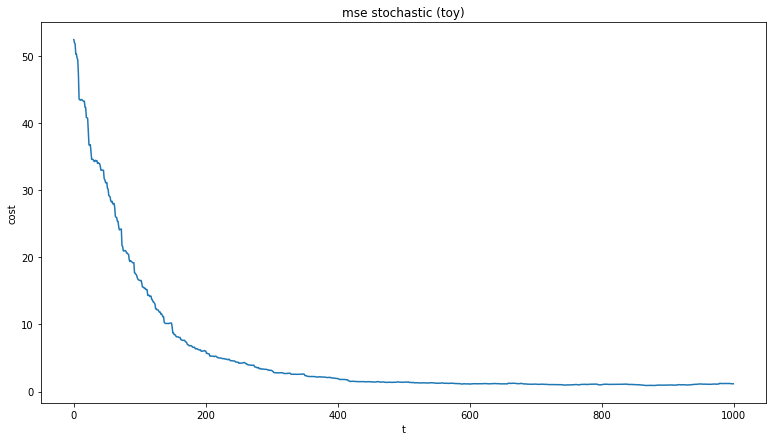

In [42]:
stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini, loss="mse",
                        alpha=0.5)

w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, 0.0117
                                         , n_iter, w_ini,
                                         loss=loss, alpha=10, average=False)

plt.figure(figsize=(13,7))
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

### 7. Peut-on faire diminuer encore plus la fonction objectif avec un pas non-constant $( \gamma_t )_t=_{1,...,T}$ qui décroit au cours des itérations ? Si oui, quel problème cela pose-t-il en pratique ?

In [24]:
COMMENTAIRE

## le pas gamma(t) garantie la convergence mais est plus lent, mais gamma choisie en particulier peut aller plus vite et faire n'importequoi 